In [ ]:
filename = 'HW/abai_poems.txt'
with open(filename, 'rt') as file:
    corpus = file.read()

# corpus length
print(len(corpus), 'characters')
print(len(corpus.split()), 'words')

88069 characters
13325 words


Target Corpus Frequency Sample: [('сөз', 60), ('жыл', 59), ('көп', 57), ('алмай', 49), ('жүр', 47), ('күн', 43), ('болса', 41), ('мал', 38), ('шы', 35), ('жас', 34)]
Reference Corpus Frequency Sample: [('бап', 476), ('қолданысқа', 410), ('заңды', 371), ('қазақстан', 353), ('енгізіледі', 332), ('республикасының', 300), ('қр', 297), ('басқа', 283), ('ресми', 280), ('алғашқы', 270)]

1st 25 Target Corpus Words:
 ['абай', 'шығармашылығы', 'өлеңдері', 'абралыға', 'жасымнан', 'көп', 'көрдім', 'мұсылманды', 'кәпірді', 'абыралыдай', 'көрмедім', 'намаз', 'білмес', 'пақырды', 'қираәтін', 'оқытып', 'көріп', 'едім', 'шатылды', 'ниет', 'қыла', 'білмейді', 'қылады', 'нәпілді', 'намазшамның']

1st 25 Reference Corpus Words:
 ['қазақстан', 'республикасының', 'азаматтық', 'кодексi', 'қазақстан', 'республикасының', 'кодексі', 'жылғы', 'желтоқсандағы', 'хiii', 'зқаи-ның', 'ескертпесі', 'қазақстан', 'республикасы', 'жоғарғы', 'кеңесінің', 'жылғы', 'желтоқсандағы', 'xiii', 'қаулысымен', 'қолданысқа', 'енгі

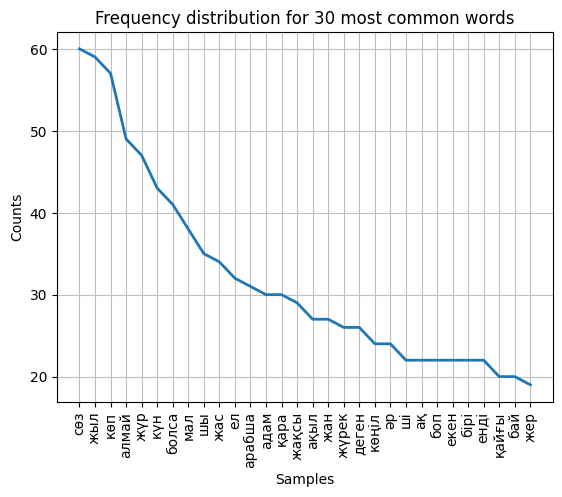

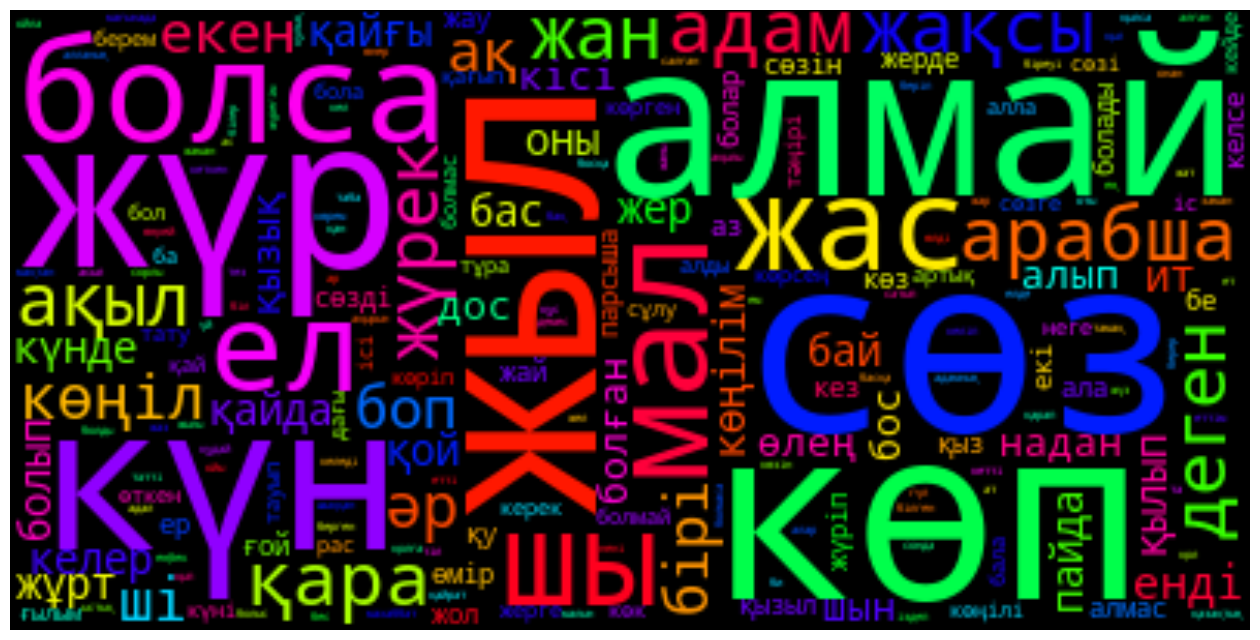

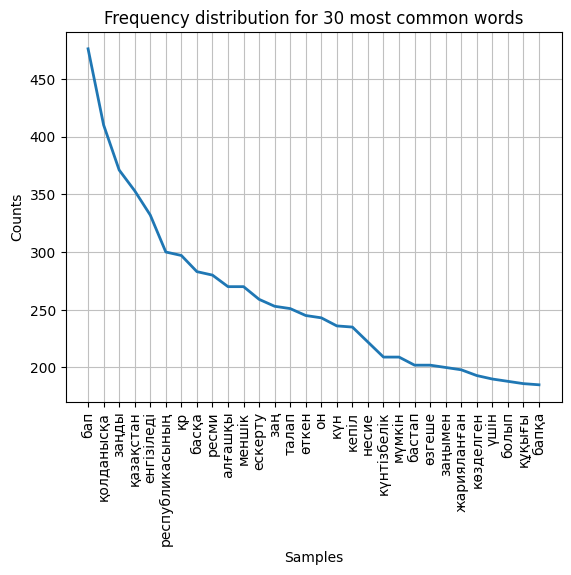

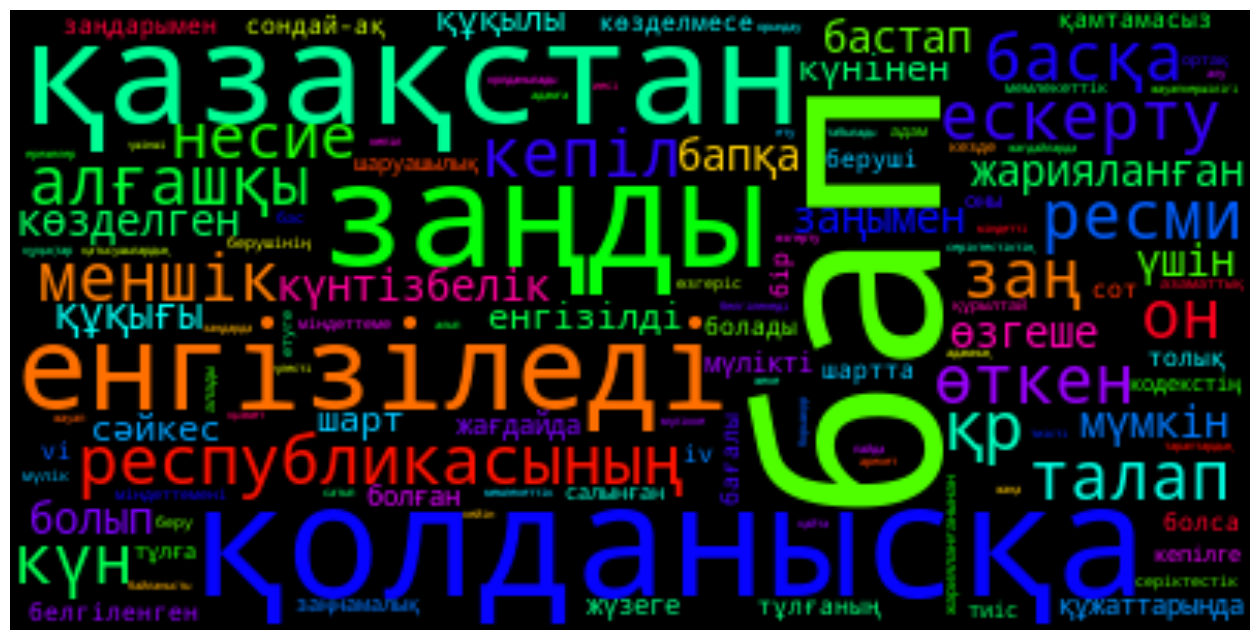

In [70]:
from nltk.corpus import stopwords
from typing import List
import re
import string
from collections import Counter
from keyness import log_likelihood
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.probability import FreqDist
import nltk

# Removes punctuation
def clean_punctuation(tokens: List[str]) -> List[str]:
    return [w.strip(string.punctuation) for w in tokens if w.strip(string.punctuation)]

def clean_string(input_string: str) -> str:
    # Remove digits, » and the word "open"
    cleaned_string = re.sub(r'\d+', '', input_string)  # Remove digits
    cleaned_string = cleaned_string.replace('»', '')  # Remove the character »
    cleaned_string = cleaned_string.replace('«', '')  # Remove the word "open"
    
    return cleaned_string


# Tokenize function
def tokenize(text: str) -> List[str]:
    return re.split(r"\s+", text)

# Custom additional stopwords
custom_stopwords = set([
    "'", "♪", "-", ">", "=", ".", ",", "á", "é", 
    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", 
    "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", 
    "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", 
    "u", "v", "w", "x", "y", "z",
    '"', "”", "“", "¿", "í", "ó", "&", ">", "<", "(", ")", "[", "]", "{", "}", ":", ";", "!", "?", "/", "\\", 
    "1", "2", "3", "4", "5", "6", "7", "8", "9", "0", 
    '№', 'бір', '–', 'және', 'бойынша', 'немесе', 'деп', 'да', 'де', '—', 'не', 'егер', 'ма', 'кім', 'ме', 'пен'
])

# Modified function to filter both standard stopwords and custom stopwords
def filter_stopwords(tokens: List[str]) -> List[str]:
    stop_words = set(stopwords.words('kazakh'))  # Load standard stopwords
    all_stopwords = stop_words.union(custom_stopwords)  # Merge with custom list
    
    # Ensure lowercase matching and remove empty or whitespace-only tokens
    return [w.lower().strip() for w in tokens if w.lower().strip() not in all_stopwords and w.strip()]

# Plots most common words
def plot_most_common_words(tokens: List[str], count: int = 30) -> None:
    freqDist = FreqDist(tokens)
    freqDist.plot(count, title='Frequency distribution for 30 most common words')

# Plots word cloud
def plot_wordcloud(tokens: List[str]) -> None:
    dictionary = Counter(tokens)
    cloud = WordCloud(max_font_size=80, colormap="hsv").generate_from_frequencies(dictionary)
    plt.figure(figsize=(16, 12))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


with open('HW/abai_poems.txt', 'r', encoding='utf-8') as f:
    text = f.read()
with open('HW/civil_code_kz.txt', 'r', encoding='utf-8') as f:
    ref_text = f.read()
    
    
lex_tokens = tokenize(clean_string(text.lower()))
ref_lex_tokens = tokenize(clean_string(ref_text.lower()))
    
lex_tokens = clean_punctuation(lex_tokens)
ref_lex_tokens = clean_punctuation(ref_lex_tokens)
    
lex_tokens = filter_stopwords(lex_tokens)
ref_lex_tokens = filter_stopwords(ref_lex_tokens)

corpus = lex_tokens
reference_corpus = ref_lex_tokens
    
# Convert tokens into frequency dictionaries
corpus_freq = Counter(corpus)  # Count occurrences of words in target corpus
ref_freq = Counter(reference_corpus)  # Count occurrences in reference corpus
    
# Log-likelihood keyness testing
keyness_results = log_likelihood([corpus], [reference_corpus])
    
# Bigrams and Trigrams
#bigram_collocation = BigramCollocationFinder.from_words(corpus)
#bigrams = bigram_collocation.nbest(BigramAssocMeasures.pmi, 50)
#bigram_pmi = sorted(bigram_collocation.score_ngrams(BigramAssocMeasures.pmi), key=lambda x: x[1], reverse=True)
    
trigram_collocation = TrigramCollocationFinder.from_words(corpus)
trigrams = trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 50)

bigram_collocation = BigramCollocationFinder.from_words(reference_corpus)
bigrams = bigram_collocation.nbest(BigramAssocMeasures.pmi, 50)
bigram_pmi = sorted(bigram_collocation.score_ngrams(BigramAssocMeasures.pmi), key=lambda x: x[1], reverse=True)
    
trigram_collocation = TrigramCollocationFinder.from_words(reference_corpus)
trigrams = trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 50)
    
# Debug LL results
print("Target Corpus Frequency Sample:", corpus_freq.most_common(10))
print("Reference Corpus Frequency Sample:", ref_freq.most_common(10))
    
# Print results
print("\n1st 25 Target Corpus Words:\n", lex_tokens[:25])
print("\n1st 25 Reference Corpus Words:\n", ref_lex_tokens[:25])
    
print("\nKeyword LL  Freq(Tgt) Freq(Ref)")
for x in range(min(100, len(keyness_results))):
    print(keyness_results[x])
print("\nBigrams:")
for x in range(min(25, len(bigrams))):
    print(bigrams[x], bigram_pmi[x])
print("\nTrigrams:")
for x in range(min(25, len(trigrams))):
    print(trigrams[x])
    
# Generate frequency plots
plot_most_common_words(corpus)
plot_wordcloud(corpus)

plot_most_common_words(reference_corpus)
plot_wordcloud(reference_corpus)

In [5]:
#View-in-context
#https://stackoverflow.com/questions/29110950/python-concordance-command-in-nltk

from nltk.text import Text  
from nltk import word_tokenize

# load target corpus
filename = 'HW/abai_poems.txt'
file = open(filename, 'rt')
corpus = file.read()
file.close()
# text cleaning code adapted from https://machinelearningmastery.com/clean-text-machine-learning-python/
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(corpus)
# remove all tokens that are not alphabetic
# corpus_words = [word for word in tokens if word.isalpha()]
corpus_words = tokens

textList = Text(corpus_words)
textList.concordance('алмай')

Displaying 25 of 49 matches:
егін ақтан тіккіштеп , Күні-түні дем алмай , Бітіруге жүр күштеп , Асыққансып ,
ы жай , Шаршап қалған кеудемде тулай алмай . Кейде ыстық қан басып кетеді оны ,
і оны , Дөңбекшіген түндерде тыншыға алмай . Қараңғы саңырау қайғы ойды жеңген 
жай , Өз дертін тығып ішке , білдіре алмай . Кейде ыстық тағы да қан басады , К
 . Пысықтың көбі бұғып жүр , Беттесе алмай шаңқылдап . Ашылып омырау , күн ысты
ысыққа молықты . Малдының малын көре алмай , Борышын түгел бере алмай , Көрінге
алын көре алмай , Борышын түгел бере алмай , Көрінгенге обықты . Қазақтың малын
лықты . Өзінен шыққан жақсылар Түзей алмай зорықты . Бөтен елдің адамы , Тынбағ
дагер қашты бұл елден , Несиесін жия алмай . Бұралқылар сандалды , Жуандарға сы
 Бұралқылар сандалды , Жуандарға сыя алмай . Сенімсіз болды алашқа , Барымтасын
німсіз болды алашқа , Барымтасын тыя алмай . Нанымы жоқ , анты бар , Ел нұсқасы
ң тамырынтүсік шалып , Бетегеге жете алмай болар жазым . Мен дағы көп есіттім ж
 қарап сөз 

In [6]:
import re

def process_poems(text):
    # Split text into poem sections based on titles (uppercase words with possible hyphens/spaces)
    poem_sections = re.split(
        r'(\b[A-ZА-ЯҒҮҚӨІӘҢҺ]+[\s\-—]*[A-ZА-ЯҒҮҚӨІӘҢҺ\s\-—]*\b)',
        text
    )
    
    poems = []
    current_title = None
    
    # Group split sections into title-content pairs
    for i, section in enumerate(poem_sections):
        if i % 2 == 1:  # Title section (odd indices)
            current_title = section.strip()
        else:
            if current_title and section.strip():
                content = section.strip()
                poems.append((current_title, content))
                current_title = None
    
    # Process each poem
    cleaned_poems = []
    for title, content in poems:
        # Remove footnotes (e.g. "1 - ...") 
        content = re.sub(r'\d+\s*[-–].*?(\s+|$)', '', content, flags=re.DOTALL)
        # Remove dates (e.g. "1901-ші жыл")
        content = re.sub(r'\d{4}-(ші|шы) жыл', '', content)
        # Remove digits from text
        content = re.sub(r'\d+', '', content)
        
        # Combine title and cleaned content
        full_poem = f"{title}\n{content}".strip()
        cleaned_poems.append(full_poem)
    
    return cleaned_poems

poems = process_poems(corpus)

In [7]:
def repair_poems_simple(poem_list):
    repaired = []
    i = 0
    
    while i < len(poem_list):
        current = poem_list[i].strip()
        
        # If the current entry is short, combine it with the next one
        if len(current) < 42 and i + 1 < len(poem_list):
            next_entry = poem_list[i + 1].strip()
            combined = current + " " + next_entry
            repaired.append(combined)
            i += 2  # Skip the next entry since we've combined it
        else:
            repaired.append(current)
            i += 1
    
    return repaired

In [8]:
repaired_poems = repair_poems_simple(repair_poems_simple(repair_poems_simple(poems)))

In [10]:
filename = 'HW/civil_code_kz.txt'
with open(filename, 'rt') as file:
    ref_corpus = file.read()

In [17]:
def split_text_into_chunks(text):
    # Define the regex pattern to match the chunk delimiter (e.g., "404-бап.")
    pattern = r'\b\d+-бап'
    
    # Split the text using the pattern
    chunks = re.split(pattern, text)
    
    # Find all the delimiters (e.g., "404-бап.")
    delimiters = re.findall(pattern, text)
    
    # Combine the delimiters with the chunks
    result = []
    for i, chunk in enumerate(chunks):
        if i == 0:
            # The first chunk doesn't have a delimiter before it
            if chunk.strip():  # Only add if it's not empty
                result.append(chunk.strip())
        else:
            # Add the delimiter and the chunk
            result.append(f"{delimiters[i-1]} {chunk.strip()}")
    
    return result

ref_corpus_chunks = split_text_into_chunks(ref_corpus)

In [19]:
print(ref_corpus_chunks[0:5])
print(repaired_poems[0:5])

['ҚАЗАҚСТАН РЕСПУБЛИКАСЫНЫҢ АЗАМАТТЫҚ КОДЕКСI Қазақстан Республикасының Кодексі 1994 жылғы 27 желтоқсандағы № 268-ХIII. ЗҚАИ-ның ескертпесі! Қазақстан Республикасы Жоғарғы Кеңесінің 1994 жылғы 27 желтоқсандағы № 269- XIII қаулысымен қолданысқа енгізілді. Қолданушылар назарына. Қолданушыларға ыңғайлы болуы үшін ЗҚАИ мазмұнды жасады. МАЗМҰНЫ Ескерту. Мазмұны алып тасталды – ҚР 12.07.2022 № 138-VII (алғашқы ресми жарияланған күнінен кейін күнтізбелік алпыс күн өткен соң қолданысқа енгізіледі) Заңымен. Ескерту. ҚР 1999.11.04 № 472 Заңымен енгізілген өзгерістер 01.01.2000 бастап қолданысқа енгізіледі. Ескерту. Мәтiнде "бөлiм" деген сөздiң алдындағы "I - IІІ" деген цифрлар тиiсiнше " 1 - 3" деген цифрлармен ауыстырылды - ҚР 2004.12.20 № 13 Заңымен (2005 жылғы 1 қаңтардан бастап қолданысқа енгізіледі). Жалпы бөлім 1 бөлiм. Жалпы ережелер 1-тарау. Азаматтық-құқықтық қатынастарды реттеу', '1-бап . Азаматтық заңдармен реттелетiн қатынастар 1. Азаматтық заңдармен тауар-ақша қатынастары және қатыс

/Users/jmatveyenko/Documents/JM_RAND/PRGS/420 Text Analysis/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


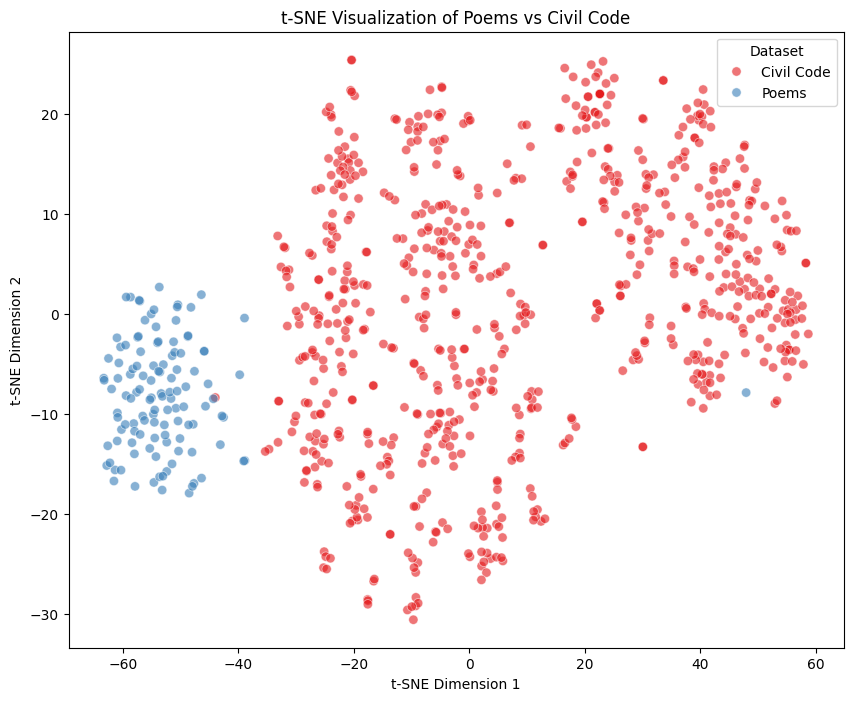

In [27]:
import re
import string
import numpy as np
from typing import List
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenize function
def tokenize(text: str) -> List[str]:
    return re.split(r"\s+", text)

# Clean punctuation
def clean_punctuation(tokens: List[str]) -> List[str]:
    return [w.strip(string.punctuation) for w in tokens if w.strip(string.punctuation)]

# Custom stopwords
custom_stopwords = set([
    "'", "♪", "-", ">", "=", ".", ",", "á", "é", 
    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", 
    "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", 
    "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", 
    "u", "v", "w", "x", "y", "z",
    '"', "”", "“", "¿", "í", "ó", "&", ">", "<", "(", ")", "[", "]", "{", "}", ":", ";", "!", "?", "/", "\\", 
    "1", "2", "3", "4", "5", "6", "7", "8", "9", "0", 
    '№', 'бір', '–', 'және', 'бойынша', 'немесе', 'деп', 'да', 'де', '—', 'не', 'егер', 'ма', 'кім', 'ме', 'пен'
])

# Filter stopwords
def filter_stopwords(tokens: List[str]) -> List[str]:
    stop_words = set(stopwords.words('kazakh'))  # Load standard stopwords
    all_stopwords = stop_words.union(custom_stopwords)  # Merge with custom list
    return [w.lower().strip() for w in tokens if w.lower().strip() not in all_stopwords and w.strip()]

# Full preprocessing pipeline
def preprocess(text: str) -> List[str]:
    tokens = tokenize(text)
    tokens = clean_punctuation(tokens)
    tokens = filter_stopwords(tokens)
    return tokens

# Combine datasets
all_texts = ref_corpus_chunks + repaired_poems

# Preprocess all texts
preprocessed_texts = [" ".join(preprocess(text)) for text in all_texts]

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X = vectorizer.fit_transform(preprocessed_texts)

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X.toarray())

# Create labels for the two datasets
labels = np.array(["Civil Code"] * len(ref_corpus_chunks) + ["Poems"] * len(repaired_poems))

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_tsne[:, 0], y=X_tsne[:, 1],
    hue=labels,
    palette="Set1",
    alpha=0.6,
    s=45
)
plt.title("t-SNE Visualization of Poems vs Civil Code")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Dataset")
plt.show()

In [29]:
import pandas as pd

# Create a DataFrame with t-SNE coordinates, labels, and original text
df = pd.DataFrame({
    "x": X_tsne[:, 0],  # t-SNE dimension 1
    "y": X_tsne[:, 1],  # t-SNE dimension 2
    "label": labels,    # Dataset labels
    "text": all_texts   # Original text
})

# Group by label and find min/max x for each label
min_max_x = df.groupby("label")["x"].agg(["min", "max"]).reset_index()

# Merge min/max x values back into the original DataFrame
df = df.merge(min_max_x, on="label", how="left")

# Display the DataFrame
print(df.head())

           x          y       label  \
0  44.387585  15.144155  Civil Code   
1   4.266583  -5.445845  Civil Code   
2   1.255838  -7.837445  Civil Code   
3  40.492176  -4.772655  Civil Code   
4   2.293300  -6.542240  Civil Code   

                                                text        min        max  
0  ҚАЗАҚСТАН РЕСПУБЛИКАСЫНЫҢ АЗАМАТТЫҚ КОДЕКСI Қа... -43.979073  58.678314  
1  1-бап . Азаматтық заңдармен реттелетiн қатынас... -43.979073  58.678314  
2  2-бап . Азаматтық заңдардың негiзгi бастаулары... -43.979073  58.678314  
3  2-бап қа өзгеріс енгiзiлдi - ҚР 1997.07.11 № 1... -43.979073  58.678314  
4  3-бап . Қазақстан Республикасының азаматтық за... -43.979073  58.678314  


In [30]:
# Find rows with min and max x for each label
min_x_rows = df.loc[df.groupby("label")["x"].idxmin()]
max_x_rows = df.loc[df.groupby("label")["x"].idxmax()]

# Combine results
min_max_rows = pd.concat([min_x_rows, max_x_rows])

# Display the results
print(min_max_rows[["label", "x", "text"]])

          label          x                                               text
531  Civil Code -43.979073  283-бап . Азаматты асырап-бағуға төленетiн сом...
745       Poems -63.292110  ІШІМ ӨЛГЕН\n, СЫРТЫМ САУ\nІшім өлген, сыртым с...
32   Civil Code  58.678314  20-бап . Азаматтың мүлiктiк жауапкершiлiгi 1. ...
802       Poems  47.916134  КҮН АРТЫНАН КҮН ТУАР\nКүн артынан күн туар, Бі...


In [32]:
min_max_rows.text.tolist()

['283-бап . Азаматты асырап-бағуға төленетiн сомаларды ұлғайту Азаматты тiкелей асырап-бағуға ақшалай мiндеттеме бойынша төленетiн сома ( өмiрiне немесе денсаулығына келтiрiлген зиянды өмiр бойы асырап-бағу шарты бойынша өтеу және басқалары) инфляцияның болжамды деңгейінің орташа мәніне пропорционалды түрде жыл сайын ұлғайтылады. Ескерту.',
 'ІШІМ ӨЛГЕН\n, СЫРТЫМ САУ\nІшім өлген, сыртым сау, Көрінгенге деймін-ау: Бүгінгі дос - ертең жау, Мен не қылдым, япырмау?! Өз үйінде өзендей, Күркірейді, айтса дау. Кісі алдында кірбеңдеп, Шабан, шардақ және шау. Мұндай ма едің ана күн, Мұның қалай, батыр-ау? Үш күн арқаң босаса, Бола қалдың бас асау. Жан қысылса, жайтаңдап, Жанды еріткен жайдары-ау. Жан жай тапса, сен неге Жат мінезсің жабырқау? Ұрлық пенен қулыққа, Байлағанда, кестің бау. Берерменде бесеусің, Аларманда және алтау. Топ болғанда көрерсің Түрлі дауды жүз тарау. Аяғында сендейлер, Көрмей жүр ме қанталау? Қайтып келер есікті, Қатты серіппе, жарқын-ау! Жетілсең де, жетсең де, Керек күн

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess poems
preprocessed_poems = [" ".join(preprocess(poem)) for poem in repaired_poems]

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X_tfidf = vectorizer.fit_transform(preprocessed_poems)

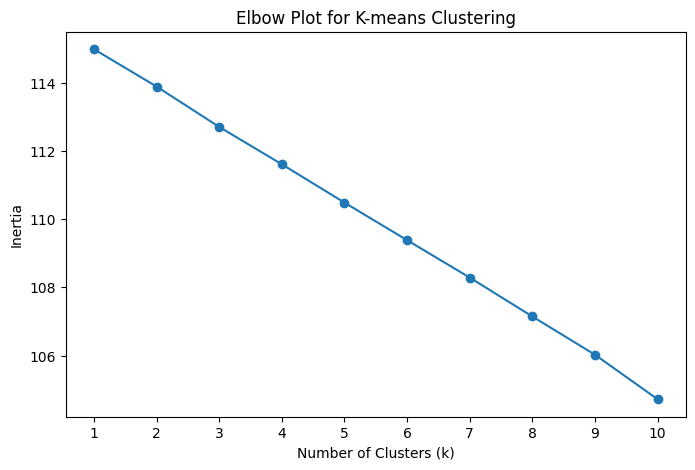

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for different numbers of clusters
inertia = []
k_values = range(1, 11)  # Test 1 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Plot for K-means Clustering")
plt.xticks(k_values)
plt.show()

In [ ]:
from sklearn.manifold import TSNE

optimal_k = 2

# Fit K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

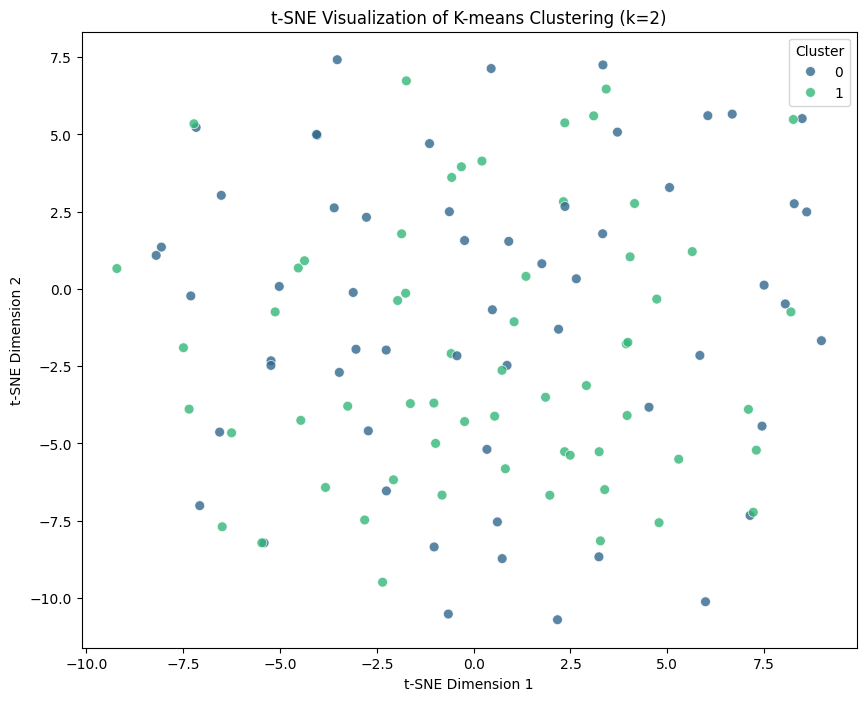

In [40]:
import seaborn as sns

# Create a DataFrame for visualization
df = pd.DataFrame({
    "x": X_tsne[:, 0],  # t-SNE dimension 1
    "y": X_tsne[:, 1],  # t-SNE dimension 2
    "cluster": clusters  # K-means cluster labels
})

# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="x", y="y",
    hue="cluster",
    palette="viridis",
    data=df,
    alpha=0.8,
    s=50
)
plt.title(f"t-SNE Visualization of K-means Clustering (k={optimal_k})")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.show()